In [1]:
import warnings
warnings.filterwarnings("ignore") 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
TWEMOJI_DATASET = './datasets/samples/combined_csv.csv'
EMOJI_MAPPINGS = './datasets/emoji_map_1791.csv'

In [3]:
twemoji = pd.read_csv(TWEMOJI_DATASET)

In [4]:
mappings = pd.read_csv(EMOJI_MAPPINGS)

In [5]:
twemoji = twemoji.reindex(np.random.permutation(twemoji.index))

# Mappings

In [6]:
# we can see that we now have the dataframe that contain all 
# the emoji mappings
mappings.head(5) 

,Unnamed: 0,category,title,shorts,unicode_alternates,keywords,ucode_short,ucode,aliases,alt_title,aliases_ascii
0,#️⃣,symbols,keycap number sign,[hash],0023-fe0f-20e3,"[keycap, symbol, pound, hash, number]",0023_fe0f_20e3,#️⃣,NaN,NaN,NaN
1,*️⃣,symbols,keycap asterisk,[asterisk],002a-fe0f-20e3,"[keycap, symbol, asterisk, star]",002a_fe0f_20e3,*️⃣,[:keycap_asterisk:],NaN,NaN
2,0️⃣,symbols,keycap digit zero,[zero],0030-fe0f-20e3,"[, keycap, symbol, number, zero, math]",0030_fe0f_20e3,0️⃣,NaN,NaN,NaN
3,1️⃣,symbols,keycap digit one,[one],0031-fe0f-20e3,"[, keycap, symbol, number, one, math]",0031_fe0f_20e3,1️⃣,NaN,NaN,NaN
4,2️⃣,symbols,keycap digit two,[two],0032-fe0f-20e3,"[, keycap, symbol, two, number, math]",0032_fe0f_20e3,2️⃣,NaN,NaN,NaN


# Cleaning and Preparing

In [7]:
# lets see how many columns 
# does the dataset have
twemoji.columns

Index(['id', 'annotations', 'id_text'], dtype='object')

In [8]:
# rename annotations to target
# rename id_text to tweet
twemoji = twemoji.rename(columns={"annotations":'target', "id_text":"text"})

In [9]:
twemoji.head() 

,id,target,text
752499,743527706571247616,635,NaN
1180913,741972504416276481,1438,NaN
1888199,747171687964217344,1387,NaN
1406257,747103866252984321,1383,NaN
2174974,747779442911567872,1403,NaN


In [10]:
# since the id column is no longer needed
# we can simply drop it
twemoji = twemoji.drop(columns=["id"])

In [11]:
twemoji.head()

,target,text
752499,635,NaN
1180913,1438,NaN
1888199,1387,NaN
1406257,1383,NaN
2174974,1403,NaN


In [12]:
# Lets check how many null values exist in 
# the dataset
twemoji['text'].isna().sum()

3878060

In [13]:
# We can't do much with null values
# So we drop them
twemoji = twemoji.dropna()

In [14]:
twemoji.head()

,target,text
1776901,1388,"Okay, i'll stop na."
1408562,1445,I'm literally soooooo soo so nice to everyone ...
1284810,1447,This shit still lame y'all listen to anything
1823249,1420,damn i really wanna talk to you but your busy ...
1227647,1389,Happy birthday thottie miss ya


In [15]:
# Lets check how big is the data set now
twemoji.shape

(88567, 2)

# Exploration

<AxesSubplot:xlabel='target'>

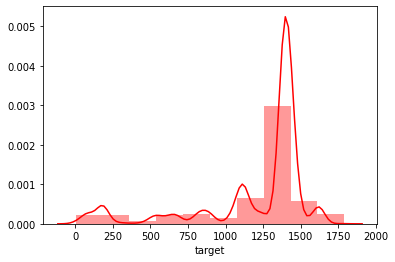

In [16]:
# lets see the distribution of our target values
sns.distplot(twemoji['target'], color='red', bins=10)

In [17]:
most_frequent = twemoji['target'].value_counts().idxmax() 
most_frequent

1381

In [18]:
# The laughing face emoji is the most popular in this dataset
mappings.loc[most_frequent]

Unnamed: 0                                                            😂
category                                                         people
title                                            face with tears of joy
shorts                                                            [joy]
unicode_alternates                                                  NaN
keywords              [emotion, cry, tear, joy, smiley, sarcastic, f...
ucode_short                                                       1f602
ucode                                                                 😂
aliases                                                             NaN
alt_title                                                           NaN
aliases_ascii                                               [:'), :'-)]
Name: 1381, dtype: object

In [19]:
# Lets see the 10 most frequently used emojis
top_ten = twemoji['target'].value_counts()[:10].index.tolist() 
top_ten

[1381, 1447, 1424, 1392, 1389, 186, 1620, 1420, 1446, 1403]

In [20]:
# lets see the mappings
mappings.loc[top_ten]

,Unnamed: 0,category,title,shorts,unicode_alternates,keywords,ucode_short,ucode,aliases,alt_title,aliases_ascii
1381,😂,people,face with tears of joy,[joy],NaN,"[emotion, cry, tear, joy, smiley, sarcastic, f...",1f602,😂,NaN,NaN,"[:'), :'-)]"
1447,🙄,people,face with rolling eyes,"[rolling_eyes, face_with_rolling_eyes]",NaN,"[emotion, eyes, rolling eyes, smiley, sarcasti...",1f644,🙄,[:face_with_rolling_eyes:],NaN,NaN
1424,😭,people,loudly crying face,[sob],NaN,"[emotion, sob, tear, cry, smiley, sad, heartbr...",1f62d,😭,NaN,NaN,NaN
1392,😍,people,smiling face with heart shaped eyes,[heart_eyes],NaN,"[emotion, heart, eye, love, smiley, face, beau...",1f60d,😍,NaN,smiling face with heart-shaped eyes,NaN
1389,😊,people,smiling face with smiling eyes,[blush],NaN,"[emotion, beautiful, good, eye, smiley, face, ...",1f60a,😊,NaN,NaN,NaN
186,❤,symbols,heavy black heart,[heart],2764-fe0f,"[heart, symbol, love, parties]",2764,❤,NaN,NaN,[<3]
1620,🤔,people,thinking face,"[thinking, thinking_face]",NaN,"[thinking, boys night, smiley, face]",1f914,🤔,[:thinking_face:],NaN,NaN
1420,😩,people,weary face,[weary],NaN,"[emotion, tired, face, smiley, sad, stressed, ...",1f629,😩,NaN,NaN,NaN
1446,🙃,people,upside down face,"[upside_down_face, upside_down]",NaN,"[smiley, silly, upside down, sarcastic, face]",1f643,🙃,[:upside_down_face:],upside-down face,NaN
1403,😘,people,face throwing a kiss,[kissing_heart],NaN,"[heart, love, smiley, face, kiss, sexy]",1f618,😘,NaN,NaN,"[:*, :-*, =*, :^*]"


In [21]:
# We see that there is a high density around 1000-1500
# lets reduce the number of emojis there exists to the
# top 10 emojis that exists in the dataset
# we could reduce the complexity of our problem. 
index_names = twemoji[~twemoji['target'].isin(top_ten)].index
twemoji = twemoji.drop(index_names)

<AxesSubplot:xlabel='target'>

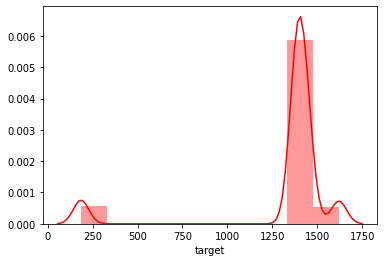

In [22]:
# lets see the distribution once again
sns.distplot(twemoji['target'], color='red', bins=10)

In [23]:
# For sanity check lets see if the remaining emojis
# are only the top ten emojis
twemoji['target'].value_counts().index.tolist() 

[1381, 1447, 1424, 1392, 1389, 186, 1620, 1420, 1446, 1403]

In [24]:
twemoji.shape

(32895, 2)

## Using NLTK

In [25]:
corpus = nltk.Text(twemoji['text'])

In [26]:
len(corpus)

32895

### Lexical Rishness

We can check how many times a word is used on average.
It's good that a corpus is lexically rich as, theoretically,
the MT system will 'learn' how to deal with a broader range of words.
This indicator can be obtained by dividing `total number of words` by `number of unique words`

In [27]:
len(corpus) / len(set(corpus))

1.0325506937033084

In [28]:
# Lets check the frequencies of words
fdistcorpus = nltk.FreqDist(corpus)
fdistcorpus

FreqDist({'thank you': 62, 'thanks': 32, 'Thank you': 27, 'Same': 25, 'same': 20, 'I know': 19, 'thank you ': 18, 'love you': 13, 'Thanks': 12, 'Bruh': 12, ...})

In [29]:
fdistcorpus.most_common(10) 

[('thank you', 62),
 ('thanks', 32),
 ('Thank you', 27),
 ('Same', 25),
 ('same', 20),
 ('I know', 19),
 ('thank you ', 18),
 ('love you', 13),
 ('Thanks', 12),
 ('Bruh', 12)]

## Tokenize and Stop Words

We will use the `NLTK` library to tokenize our dataset. After performing the tokenization, we could use the Porter stemming algorithm (also part of `NLTK`) to remove reduce words to their root form and later remove all the stopwords from each datapoint. 

1. We will tokenize each sentence by 


In [30]:
from nltk.stem.porter import PorterStemmer

In [31]:
def tokenizer(text): 
    return text.split()

In [32]:
porter = PorterStemmer()

In [33]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [34]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/frankpalma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords

stop = stopwords.words('english') 

In [36]:
# Spliting test and test set
from sklearn.model_selection import train_test_split
X = twemoji['text'] 
y = twemoji['target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
def print_scores(model):
    print('Best parameter set: %s ' % model.best_params_)
    print('CV Accuracy: %.3f' % model.best_score_)
    clf = model.best_estimator_
    print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

In [39]:
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None)

In [40]:
lr_param_grid = [{'vect__ngram_range': [(1, 2),],
               'vect__stop_words' : [None],
               'vect__tokenizer' : [tokenizer], 
               'clf__penalty': ['l2'],
               'clf__C': [1.0,],
              }, 
              {
                'vect__ngram_range' : [(1, 1)], 
                'vect__stop_words' : [None],
                'vect__tokenizer' : [tokenizer,], 
                'vect__use_idf' : [False],
                'vect__norm' : [None],
                'clf__penalty' : ['l2'],
                'clf__C': [1.0,],
              }
             ] 

In [41]:
svm_param_grid = [{'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
                   'vect__stop_words' : [stop, None],
                   'vect__tokenizer' : [tokenizer],
                   'clf__kernel': ['rbf'],
                   'clf__gamma': [1e-3, 1e-4],
                   'clf__C': [1, 10, 100, 1000],
                  },
                  {
                    'vect__ngram_range' : [(1, 1)], 
                    'vect__stop_words' : [stop, None],
                    'vect__tokenizer' : [tokenizer], 
                    'vect__use_idf' : [False],
                    'vect__norm' : [None],
                    'clf__kernel': ['rbf'],
                    'clf__gamma': [1e-3, 1e-4],
                    'clf__C': [1, 10, 100, 1000], 
                   }
]

In [42]:
multiNB_param_grid = [
    {
        'vect__ngram_range': [(1, 1)],
        'vect__stop_words' : [stop, None],
        'vect__tokenizer' : [tokenizer, tokenizer_porter],
    },
    {
        'vect__ngram_range' : [(1, 1), (1, 2), (1, 3)], 
        'vect__stop_words' : [stop, None],
        'vect__tokenizer' : [tokenizer, tokenizer_porter], 
        'vect__use_idf' : [False],
        'vect__norm' : [None], 
    }
    
]

In [43]:
lr_tfidf = Pipeline([('vect', tfidf), ('clf', LogisticRegression(random_state=0))])
svm_tfidf = Pipeline([('vect', tfidf), ('clf', SVC(random_state=0))])
multiNB_tfidf = Pipeline([('vect', tfidf), ('clf', MultinomialNB())])

In [44]:
gs_lr_tfidf = GridSearchCV(lr_tfidf, lr_param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=1)
gs_svm_tfidf = GridSearchCV(svm_tfidf, svm_param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
gs_multiNB_tfidf = GridSearchCV(multiNB_tfidf, multiNB_param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

In [64]:
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=False,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [65]:
print_scores(gs_lr_tfidf)

Best parameter set: {'clf__C': 1.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 2), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer at 0x1631f6f80>} 
CV Accuracy: 0.337
Test Accuracy: 0.345


In [7]:
mappings.iloc[1381]['ucode']

'😂'

## Bag-Of-Words Model

`Bag of words` allows us to represent text as numberical feature vectors. 
This idea behind the bag of words model can be summarized as follows

1. Create a vocabulary of unique tokens, for example words, from the entire set of documents
2. Concstruct a feature vector from each document that contains the counts of how often wach word occurs
    in the particular document
    
Unique words in documents represent only a small subset of all words in the `bag of words` vocabulary, therfore the feature vectors will mostly consist of zeros, which is why we call them `sparse`


## Hashing Vectorizer

In [45]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import SGDClassifier

In [48]:
vect = HashingVectorizer(decode_error='ignore', n_features=2**21, preprocessor=None, tokenizer=tokenizer)

In [49]:
# using logistic regression
sgdc_clf = SGDClassifier(loss='log', random_state=0, max_iter=1)

In [50]:
sgdc_clf.fit(vect.transform(X_train), y_train)

SGDClassifier(loss='log', max_iter=1, random_state=0)

In [51]:
sgdc_clf.score(vect.transform(X_test), y_test)

0.3298885511651469

In [55]:
probs = sgdc_clf.predict_proba(vect.transform(['Hello World!']))

In [63]:
best_n = np.argsort(probs, axis=1)

In [64]:
best_n

array([[7, 5, 9, 4, 8, 6, 2, 0, 3, 1]])

In [75]:
sgdc_clf.classes_

array([ 186, 1381, 1389, 1392, 1403, 1420, 1424, 1446, 1447, 1620])

In [77]:
mappings.iloc[1403]

Unnamed: 0                                                  😘
category                                               people
title                                    face throwing a kiss
shorts                                        [kissing_heart]
unicode_alternates                                        NaN
keywords              [heart, love, smiley, face, kiss, sexy]
ucode_short                                             1f618
ucode                                                       😘
aliases                                                   NaN
alt_title                                                 NaN
aliases_ascii                              [:*, :-*, =*, :^*]
Name: 1403, dtype: object

In [7]:
import pickle
import os

In [8]:
pkl_dest = os.path.join('src', 'pkl_objects')

In [78]:
pickle.dump(sgdc_clf, open(os.path.join(pkl_dest ,'sgdc_clf.pkl'), 'wb'),)

In [79]:
pickle.dump(mappings, open(os.path.join(pkl_dest,'emoji_mappings.pkl'), 'wb'))

In [36]:
import joblib

In [40]:
joblib_file = "joblib_rl.pkl"
joblib.dump(sgdc_clf, open(os.path.join(pkl_dest, joblib_file), 'wb'),)

In [5]:
import bz2
import _pickle as cPickle

In [46]:
with bz2.BZ2File(os.path.join(pkl_dest, 'cmprs.pbz2'), 'w') as f:
    cPickle.dump(sgdc_clf, f)

In [51]:
clf = cPickle.load(bz2.BZ2File(os.path.join(pkl_dest, "cmprs.pbz2",), 'rb'))

In [54]:
clf.predict(vect.transform(['i love you']))

array([186])

In [10]:
with bz2.BZ2File(os.path.join(pkl_dest, 'emoji_mappings.pbz2'), 'w') as f:
    cPickle.dump(mappings, f)

In [11]:
mapps = cPickle.load(bz2.BZ2File(os.path.join(pkl_dest, "emoji_mappings.pbz2",), 'rb'))

In [12]:
mapps

,Unnamed: 0,category,title,shorts,unicode_alternates,keywords,ucode_short,ucode,aliases,alt_title,aliases_ascii
0,#️⃣,symbols,keycap number sign,[hash],0023-fe0f-20e3,"[keycap, symbol, pound, hash, number]",0023_fe0f_20e3,#️⃣,NaN,NaN,NaN
1,*️⃣,symbols,keycap asterisk,[asterisk],002a-fe0f-20e3,"[keycap, symbol, asterisk, star]",002a_fe0f_20e3,*️⃣,[:keycap_asterisk:],NaN,NaN
2,0️⃣,symbols,keycap digit zero,[zero],0030-fe0f-20e3,"[, keycap, symbol, number, zero, math]",0030_fe0f_20e3,0️⃣,NaN,NaN,NaN
3,1️⃣,symbols,keycap digit one,[one],0031-fe0f-20e3,"[, keycap, symbol, number, one, math]",0031_fe0f_20e3,1️⃣,NaN,NaN,NaN
4,2️⃣,symbols,keycap digit two,[two],0032-fe0f-20e3,"[, keycap, symbol, two, number, math]",0032_fe0f_20e3,2️⃣,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1786,🦎,unicode9,lizard,[lizard],NaN,"[lizard, reptile]",1f98e,🦎,NaN,NaN,NaN
1787,🦏,unicode9,rhinoceros,[rhino],NaN,[rhinoceros],1f98f,🦏,[:rhinoceros:],NaN,NaN
1788,🦐,unicode9,shrimp,[shrimp],NaN,"[small, shellfish, shrimp]",1f990,🦐,NaN,NaN,NaN
1789,🦑,unicode9,squid,[squid],NaN,"[squid, molusc]",1f991,🦑,NaN,NaN,NaN
